# Pymaceuticals Inc.
---

### Analysis

- My analysis here.
- - - 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import pathlib as Path
#import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_merge = pd.merge(study_results,mouse_metadata,how="left", on=["Mouse ID"])

# Display the data table for preview
mouse_study_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(mouse_study_merge.groupby('Mouse ID'))

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

mouse_study_merge['new_col']=mouse_study_merge['Mouse ID']+mouse_study_merge['Timepoint'].astype(str)
mid_tp = mouse_study_merge["new_col"]
dup_mid=mouse_study_merge[mid_tp.isin(mid_tp[mid_tp.duplicated()])].sort_values("new_col")
dup_mid["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dup=mouse_study_merge.loc[mouse_study_merge['Mouse ID']=="g989"]
all_dup = all_dup.drop(columns=['new_col'])
all_dup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#print(len(mouse_study_merge))
mouse_study_merge = mouse_study_merge.drop(columns=['new_col'])
clean_df=mouse_study_merge.loc[mouse_study_merge['Mouse ID']!="g989"]
clean_df.reset_index()
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.

len(clean_df.groupby('Mouse ID'))


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_vol=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_vol=clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
var_vol=clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
std_vol=clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
sem_vol=clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary DataFrame.

summ_stat1=pd.concat([mean_vol,median_vol,var_vol,std_vol,sem_vol],axis=1)
summ_stat1.columns=['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance','Tumor Volume Std. Dev.','Tumor Volume Std. Err.']
summ_stat1

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

clean_df.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of observed Mouse Timepoints'>

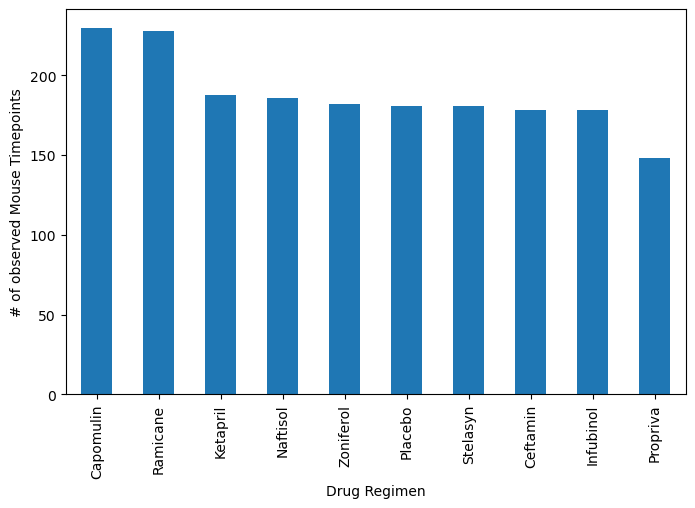

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

bar_chart=clean_df.groupby(["Drug Regimen"])["Mouse ID"].count().sort_values(ascending=False)
bar_chart.plot(kind="bar",figsize=(8,5),ylabel="# of observed Mouse Timepoints")


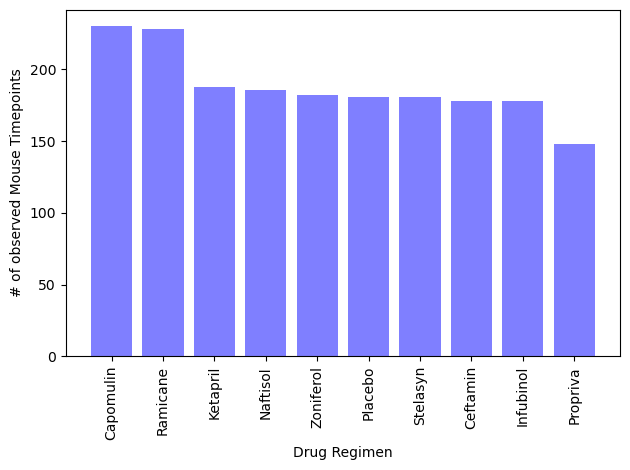

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

Grpby_drugreg=clean_df.groupby(["Drug Regimen"])["Mouse ID"].count().sort_values(ascending=False)
py_plot_bar=pd.DataFrame(Grpby_drugreg)
py_plot_bar= py_plot_bar.reset_index(drop=False)

x_axis = np.arange(len(Grpby_drugreg))
tick_locations = [value for value in x_axis]

#x_axis=py_plot_bar["Drug Regimen"]
#y_axis=py_plot_bar["Mouse ID"]

plt.bar(x_axis,py_plot_bar["Mouse ID"],color="b", alpha=0.5, align="center")
plt.ylabel("# of observed Mouse Timepoints")
plt.xticks(tick_locations, py_plot_bar["Drug Regimen"], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.tight_layout()
plt.show()


<Axes: ylabel='Sex'>

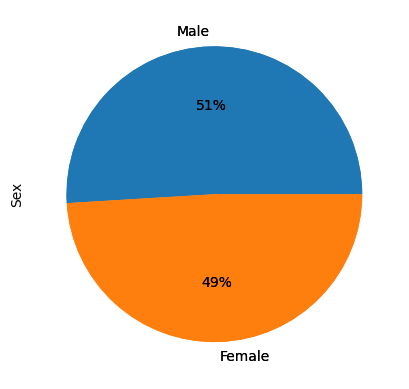

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pandas_pie_chart=clean_df.groupby('Sex').size().sort_values(ascending=False)
pandas_pie_chart.plot(kind='pie',y='Sex',autopct="%1.0f%%")
pandas_pie_chart.plot.pie(label='Sex', autopct='%1.0f%%')

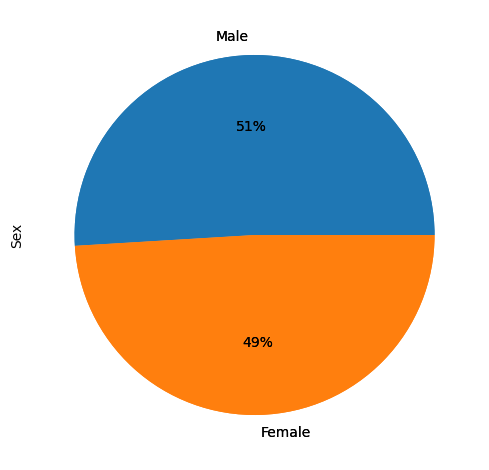

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
tr=clean_df['Sex'].value_counts().index
xc=clean_df['Sex'].value_counts()
plt.pie(xc,labels=tr,autopct="%1.0f%%")
xc.plot.pie(label='Sex', autopct='%1.0f%%')
plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

grouped_timepoint=clean_df.groupby("Mouse ID").last().reset_index()
#grouped_timepoint



In [14]:
# Put treatments into a list for for loop (and later for plot labels)

lst_trtnames=['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumour_vol=[[],[],[],[]]

# Locate the rows which contain mice on each drug and get the tumor volumes
counter=1

for row1 in lst_trtnames:  
    for index, row in grouped_timepoint.iterrows():
          if row['Drug Regimen']==row1:
              tumour_vol[counter-1].append(row['Tumor Volume (mm3)'])
    counter=counter+1
 
    # add subset 
    # Determine outliers using upper and lower bounds
for z in range(len(tumour_vol)):
    tumour_vol[z].sort()
    df=pd.DataFrame(tumour_vol[z],columns=['col1'])
    quartiles = df["col1"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(lst_trtnames[z]+"'s potential outliers :  "+str(lower_bound)+"   "+str(upper_bound))


Capomulin's potential outliers :  20.70456164999999   51.83201549
Ramicane's potential outliers :  17.912664470000003   54.30681135
Infubinol's potential outliers :  36.83290494999999   82.74144559000001
Ceftamin's potential outliers :  25.355449580000002   87.66645829999999


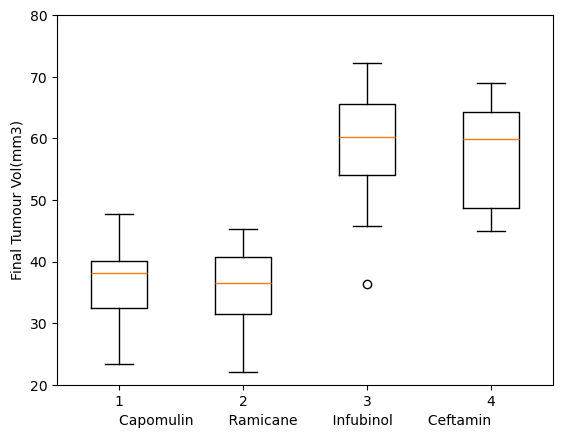

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group. 
#tumour_vol.sort()
fig1, ax1 = plt.subplots()
ax1.set_xlabel(lst_trtnames[0]+"        "+lst_trtnames[1]+"        "+lst_trtnames[2]+"        "+lst_trtnames[3])
ax1.set_ylabel('Final Tumour Vol(mm3)')
ax1.set_ylim(20,80)
ax1.boxplot(tumour_vol)
plt.show()

## Line and Scatter Plots

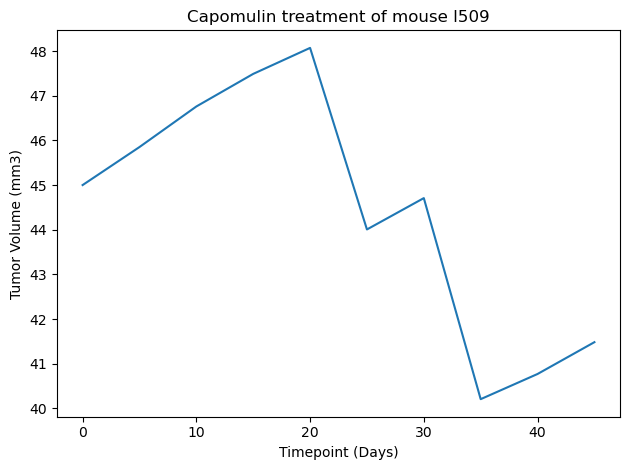

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

line_plot=clean_df.loc[(clean_df['Drug Regimen'] == "Capomulin") & (clean_df['Mouse ID'] == "l509")]
#line_plot
x=line_plot["Timepoint"]
y=line_plot["Tumor Volume (mm3)"]
plt.plot(x, y)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.tight_layout()
plt.show()


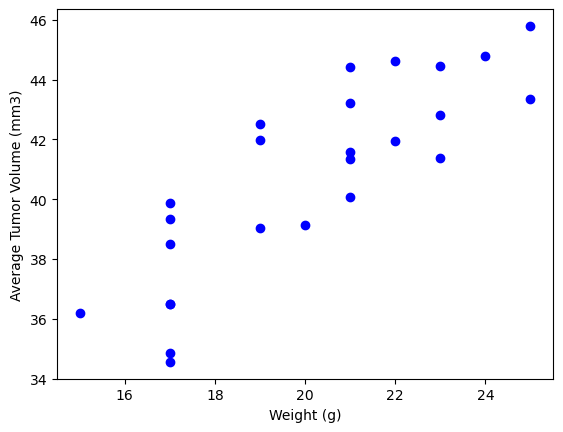

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

grp_Capomulin=clean_df.loc[(clean_df['Drug Regimen'] == "Capomulin")]

scatr_plotx=(grp_Capomulin.groupby("Mouse ID")["Weight (g)"].mean())
scatr_ploty=(grp_Capomulin.groupby("Mouse ID")['Tumor Volume (mm3)'].mean())

plt.scatter(scatr_plotx,scatr_ploty,marker="o", facecolors="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


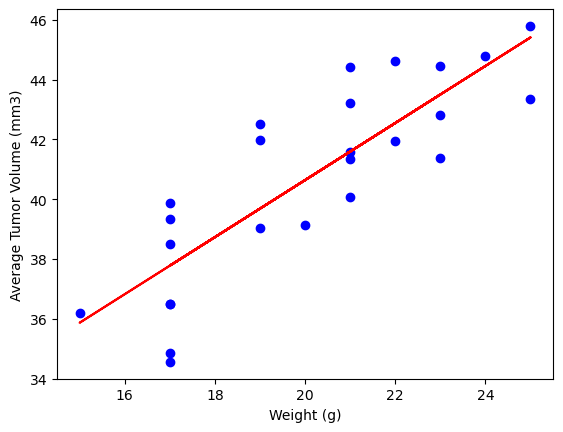

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
grp_Capomulin=clean_df.loc[(clean_df['Drug Regimen'] == "Capomulin")]

scatr_plotx=(grp_Capomulin.groupby("Mouse ID")["Weight (g)"].mean())
scatr_ploty=(grp_Capomulin.groupby("Mouse ID")['Tumor Volume (mm3)'].mean())
correlation = st.pearsonr(scatr_plotx,scatr_ploty)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

atv_slope, pe_int, pe_fit,pe_r,pe_test = st.linregress(scatr_plotx, scatr_ploty)

pe_fit = atv_slope * scatr_plotx + pe_int
    
plt.scatter(scatr_plotx,scatr_ploty,marker="o", facecolors="blue")
plt.plot(scatr_plotx,pe_fit,"-",color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
